In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
from src.data_processors import merge_data
from scripts.outlier_removal import plot_outliers_by_zscore,remove_outliers_zscore
from scripts.time_series_analysis import plot_time
from scripts.cleaning_analysis import plot_cleaning
from scripts.load_data import load_csv_file
from scripts.correlation_analysis import cor_solar_raditation_and_temprature, cor_solar_raditation_and_wind_coditions
from scripts.wind_analysis import wind_direction_and_speed_analysis
from scripts.temprature_analysis import relative_humidity_and_temprature_analysis
from scripts.histogram_analysis import histogram_analysis
from scripts.bubble_chart_analysis import bubble_chart_analysis
from scripts.remove_empty_values_with_mean import replace_empty_with_mean

In [3]:
files = {
    'benin-malanville.csv': 'Benin',
    'sierraleone-bumbuna.csv': 'Sierra Leone',
    'togo-dapaong_qc.csv': 'Togo'
}
output_filename = 'merged_data.csv'
preprocessed_data = load_csv_file('benin-malanville.csv')
#preprocessed_data = merge_data(files, country_map=files, output_filename=output_filename)
print("Preprocessed Data Preview:")
print(preprocessed_data.head(10))  # 

Attempting to load file at: /workspaces/solar-farm-insights/data/benin-malanville.csv
Preprocessed Data Preview:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
5  2021-08-09 00:06 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.8  0.0     0.4   
6  2021-08-09 00:07 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.7  0.0     0.0   
7  2021-08-09 00:08 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.7  0.7     1.3   
8  2021-08-09 00:09 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.6  0.4     1.1   
9  2021-08-09 00:10 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.6  0.5     1.1   

   WSstdev     WD  WDstdev     BP  Cleaning  Precipitation  T

In [4]:
numeric_columns = preprocessed_data.select_dtypes(include=['int64', 'float64']).dropna(axis=1, how='all').columns
print(numeric_columns)
summary_stats = preprocessed_data[numeric_columns].agg(['mean', 'median', 'std'])
print("Summary Statistics for Numeric Columns:")
print(summary_stats)

Index(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA',
       'TModB'],
      dtype='object')
Summary Statistics for Numeric Columns:
               GHI         DNI         DHI        ModA        ModB       Tamb  \
mean    226.182976  143.492732  114.575100  218.515658  218.675486  27.473316   
median    3.200000   -0.100000    3.200000    4.600000    4.600000  26.600000   
std     325.081584  254.083802  157.553268  316.058679  316.205698   3.792812   

               RH        WS    WSgust   WSstdev          WD   WDstdev  \
mean    82.349822  1.659282  2.271091  0.428457  173.215378  7.715257   
median  87.300000  1.500000  2.100000  0.400000  207.600000  7.700000   
std     15.109942  1.431753  1.788589  0.262230  102.430382  6.114362   

                BP  Cleaning  Precipitation      TModA      TModB  
mean    994.951471  0.000910       0.004120  35.480534  33.369884  
median  995.00

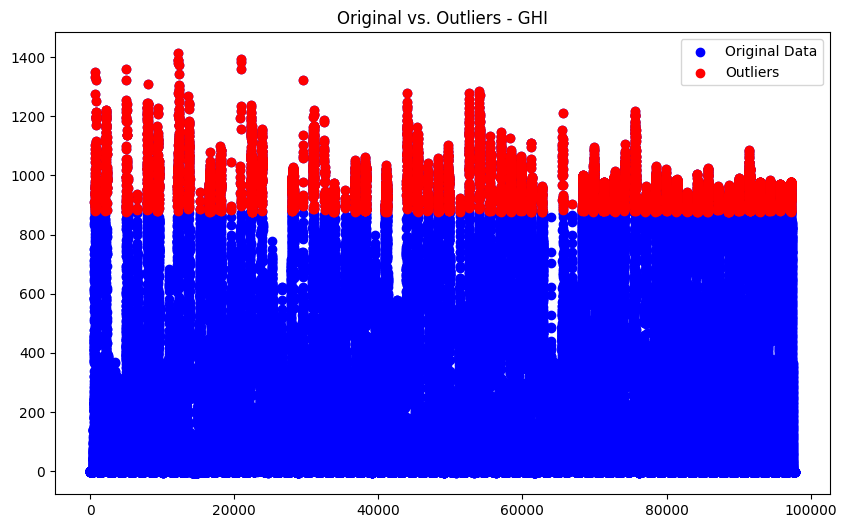

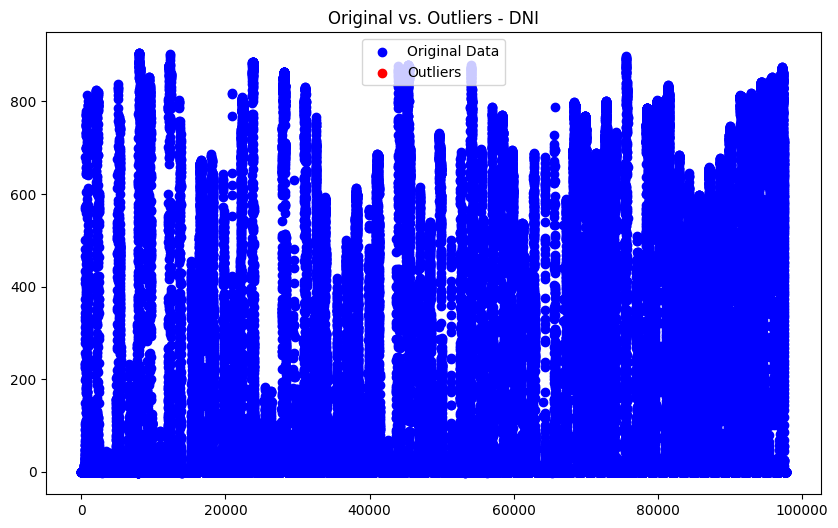

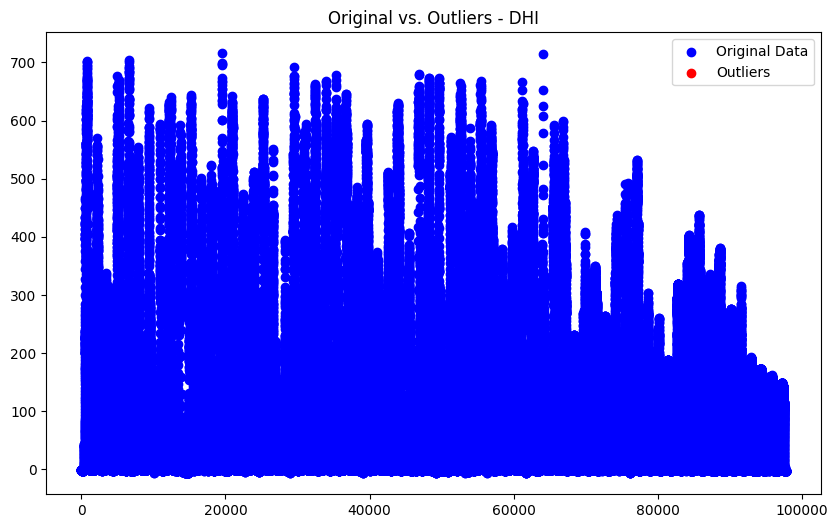

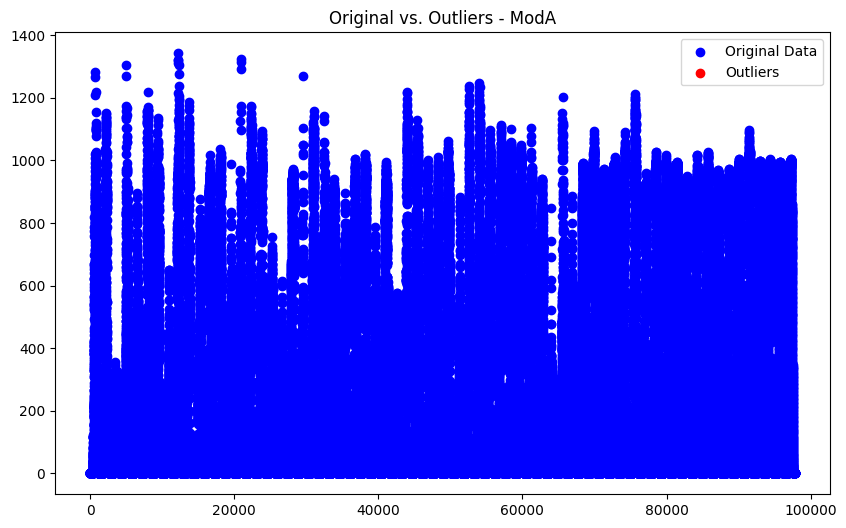

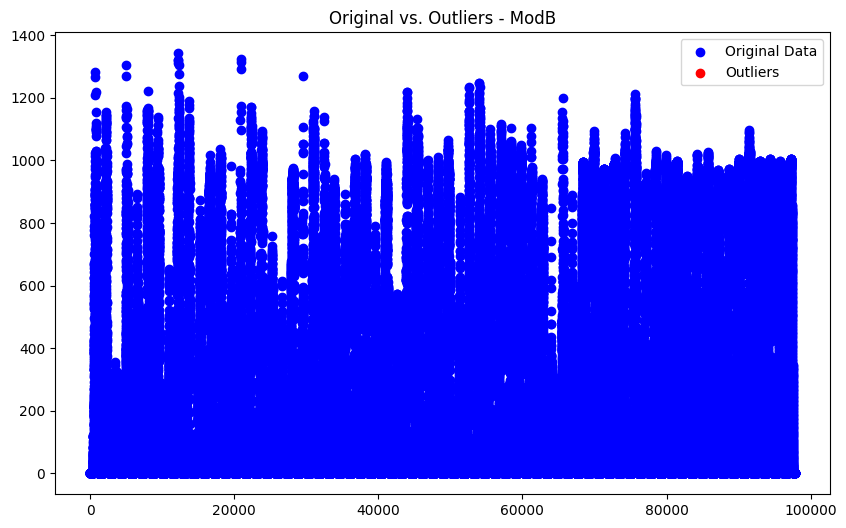

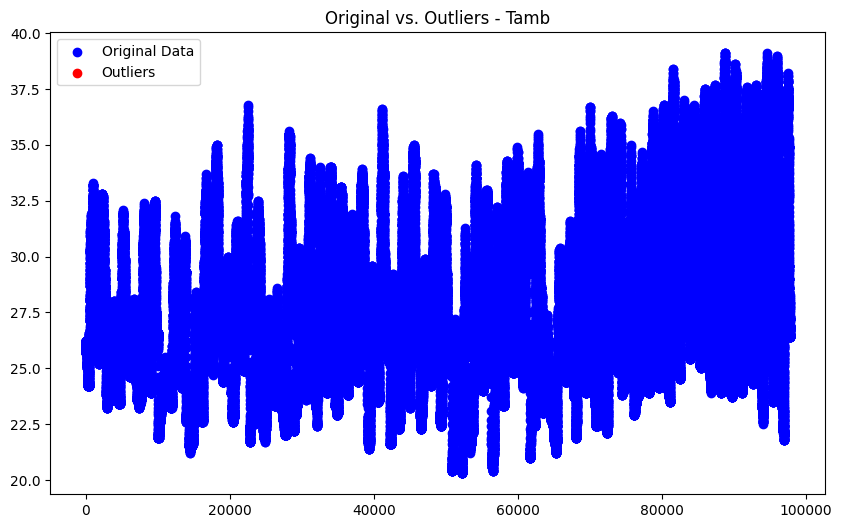

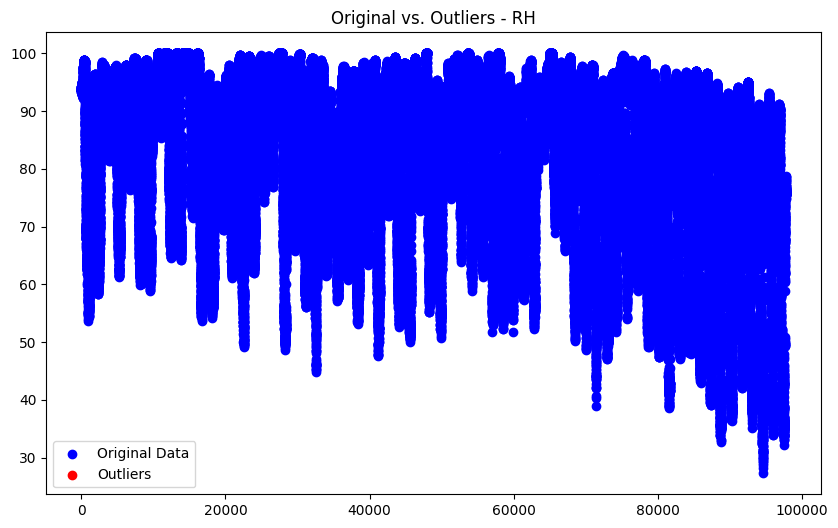

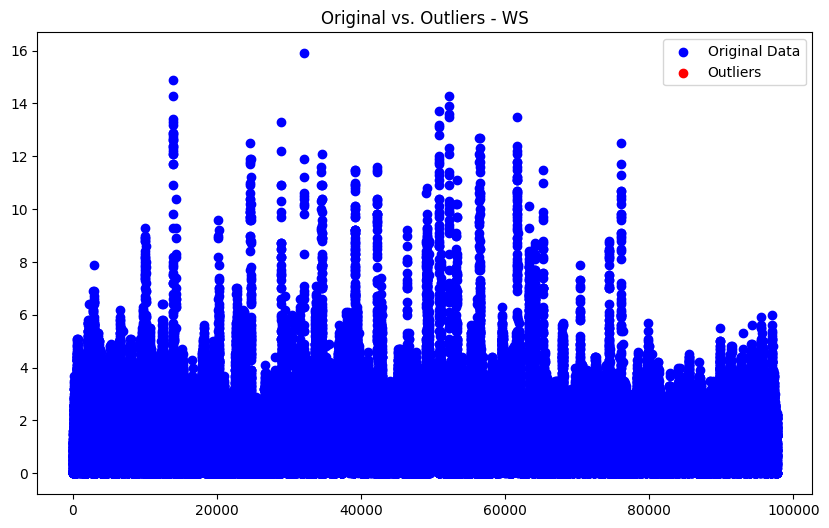

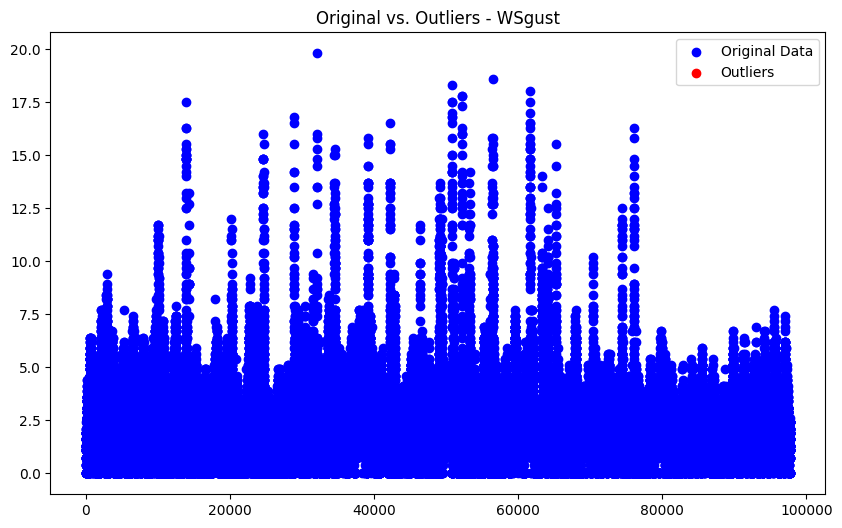

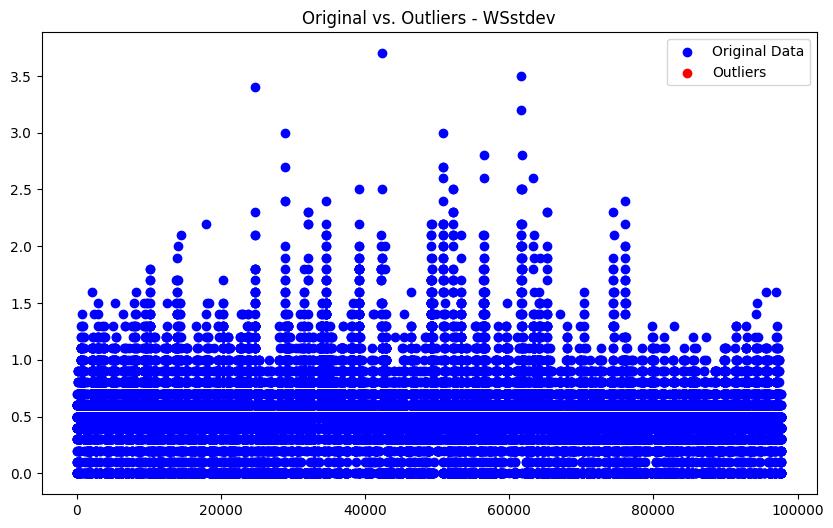

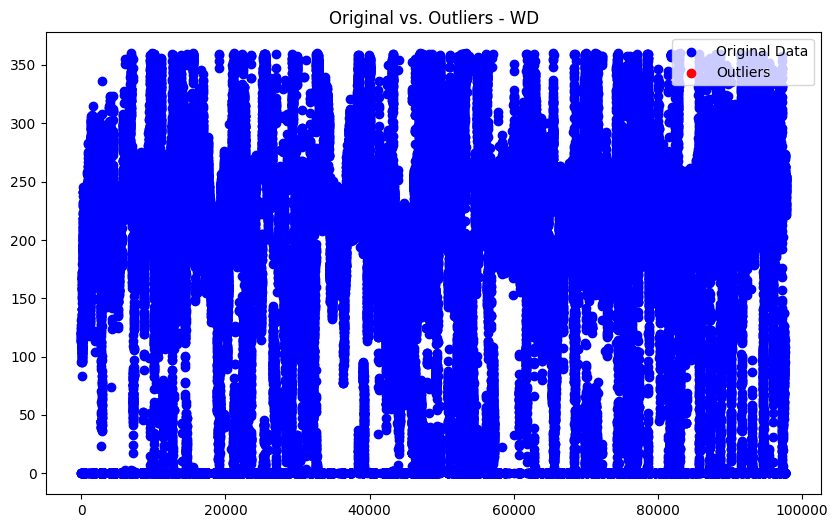

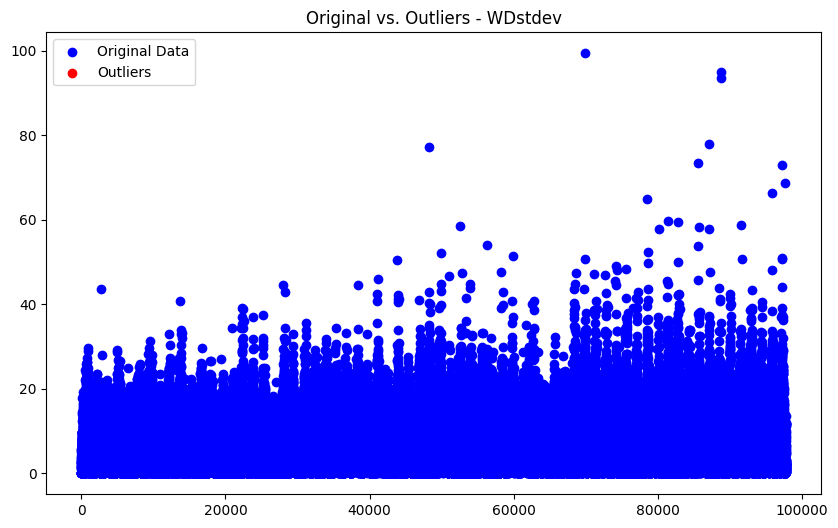

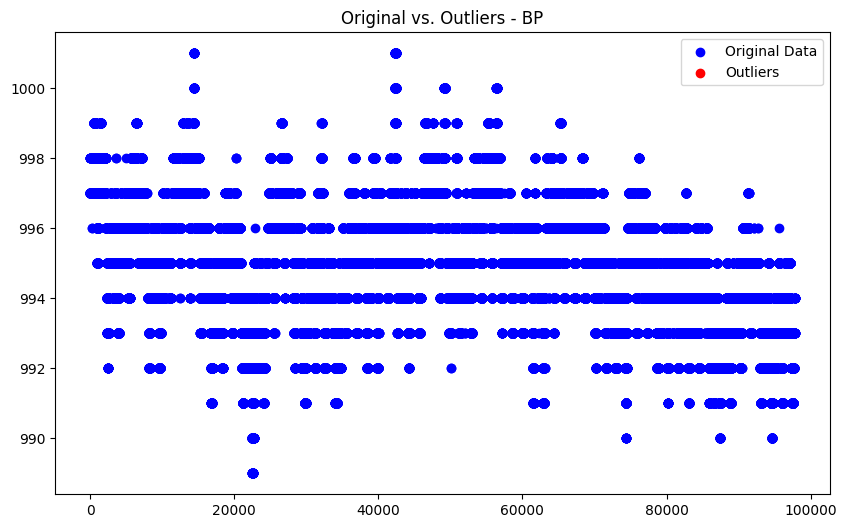

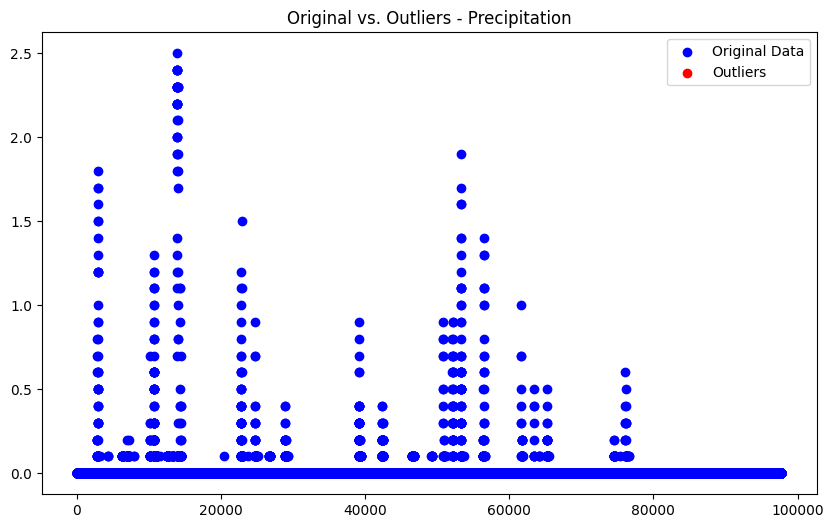

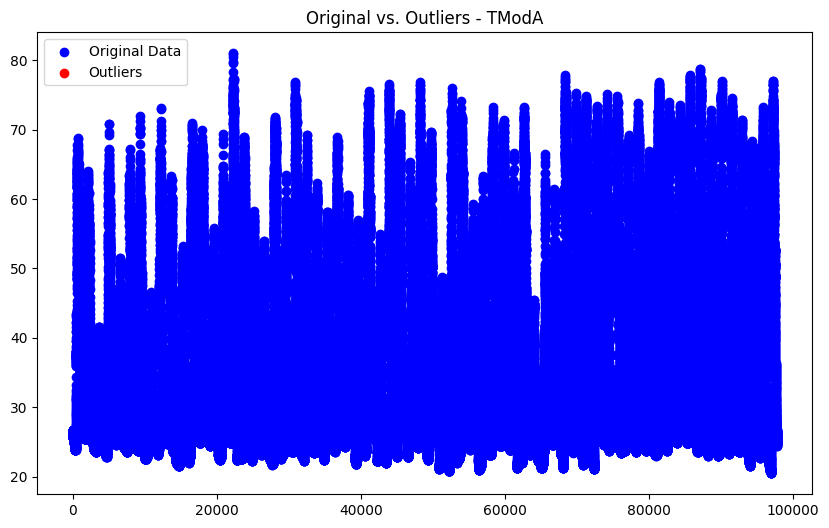

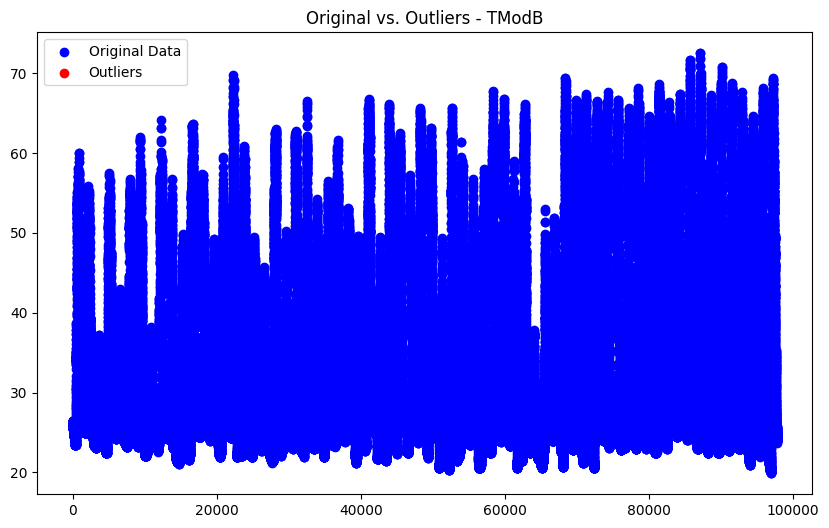

Column: GHI
Original Rows: 97777
Rows After Filtering: 90307
Removed Outliers: 7470

Column: DNI
Original Rows: 97777
Rows After Filtering: 90307
Removed Outliers: 7470

Column: DHI
Original Rows: 97777
Rows After Filtering: 90307
Removed Outliers: 7470

Column: ModA
Original Rows: 97777
Rows After Filtering: 90307
Removed Outliers: 7470

Column: ModB
Original Rows: 97777
Rows After Filtering: 90307
Removed Outliers: 7470

Column: Tamb
Original Rows: 97777
Rows After Filtering: 90307
Removed Outliers: 7470

Column: RH
Original Rows: 97777
Rows After Filtering: 90307
Removed Outliers: 7470

Column: WS
Original Rows: 97777
Rows After Filtering: 90307
Removed Outliers: 7470

Column: WSgust
Original Rows: 97777
Rows After Filtering: 90307
Removed Outliers: 7470

Column: WSstdev
Original Rows: 97777
Rows After Filtering: 90307
Removed Outliers: 7470

Column: WD
Original Rows: 97777
Rows After Filtering: 90307
Removed Outliers: 7470

Column: WDstdev
Original Rows: 97777
Rows After Filtering:

In [5]:
cleaned_data = preprocessed_data.copy()
outlier_check_cols = ['ModA','ModB','WS','WSgust']
num_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Precipitation', 'TModA',
       'TModB']
plot_outliers_by_zscore(cleaned_data,num_cols,2)
cleaned_data = remove_outliers_zscore(cleaned_data,num_cols,2,False)
cleaned_data = replace_empty_with_mean(cleaned_data)
cleaned_data.to_csv("../cleaned_data.csv", index=False)
summary_stats = cleaned_data[numeric_columns].agg(['mean', 'median', 'std'])
print("Summary Statistics for Numeric Columns After Outlier removal:")
print(summary_stats)

                GHI         DNI         DHI       Tamb
Month                                                 
2021-08  147.910109   65.357336  105.922594  26.257864
2021-09  164.790541   90.407236  105.597288  26.785243
2021-10  191.285894  178.854628   74.831129  28.894312


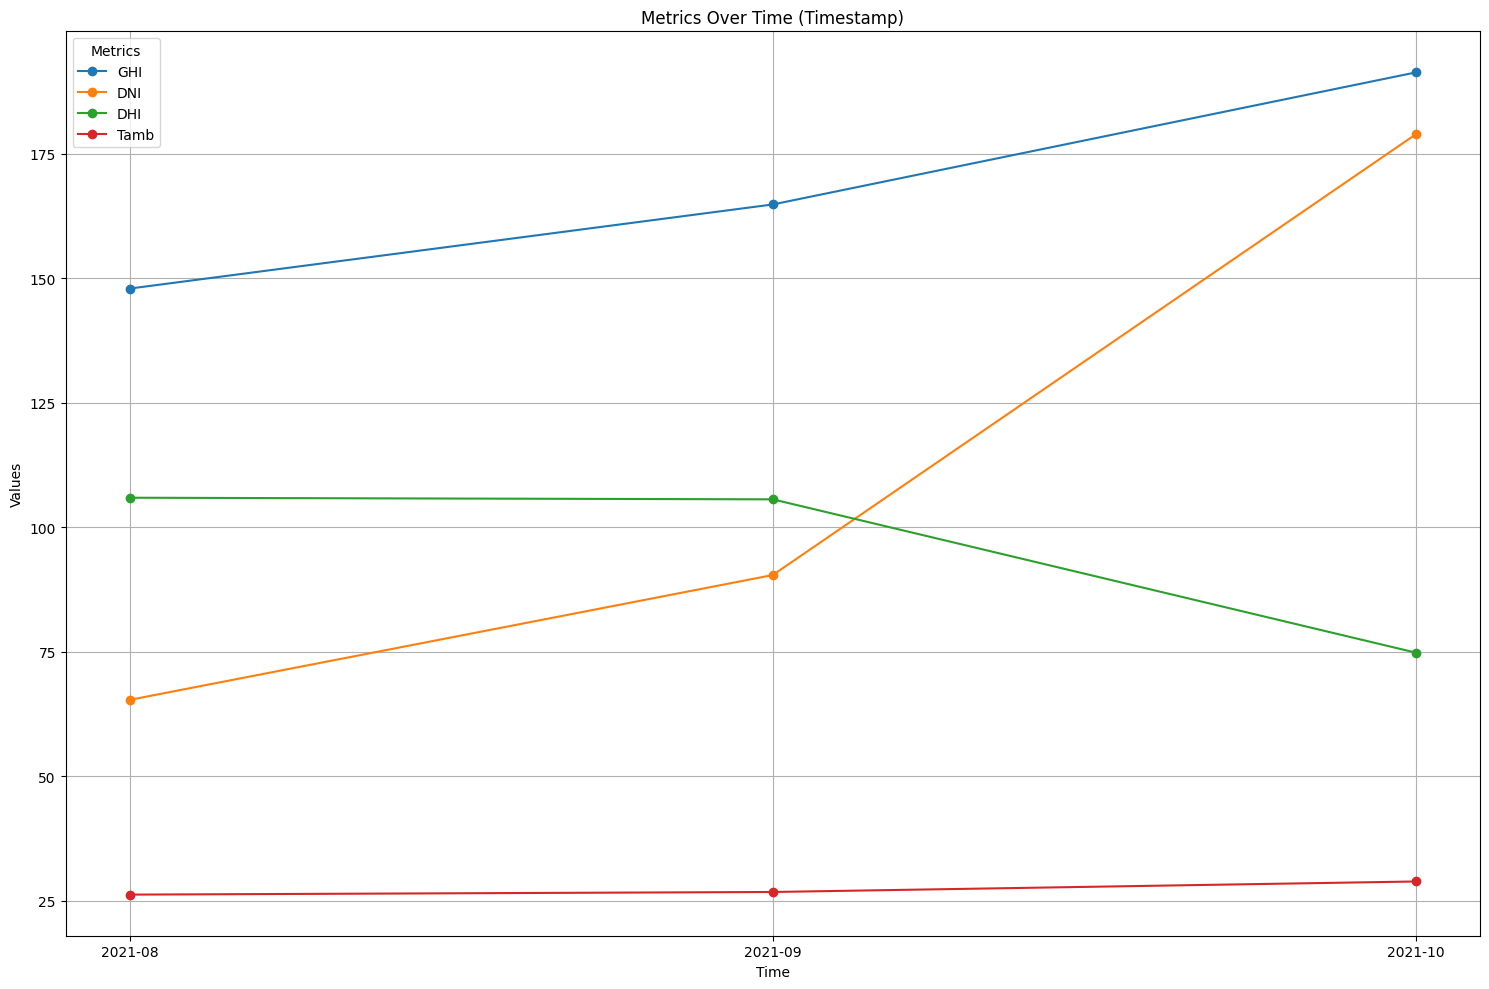

In [6]:
time_column = 'Timestamp'
ghi_metrics = ['GHI', 'DNI', 'DHI', 'Tamb']
sensor_columns = ['ModA', 'ModB']
cleaning_column = 'Cleaning'

plot_time(cleaned_data, time_column, ghi_metrics)

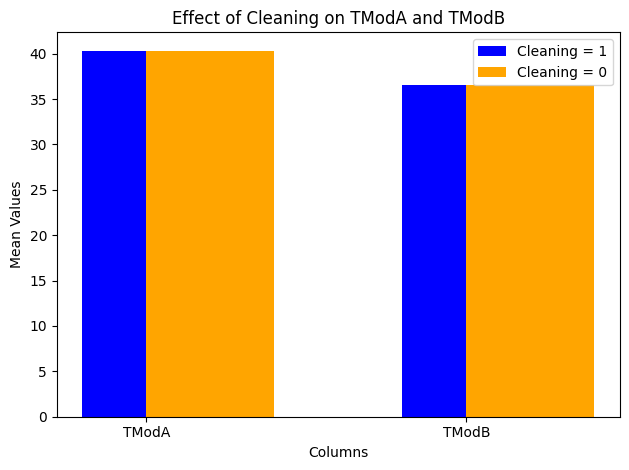

In [7]:
plot_cleaning(cleaned_data)

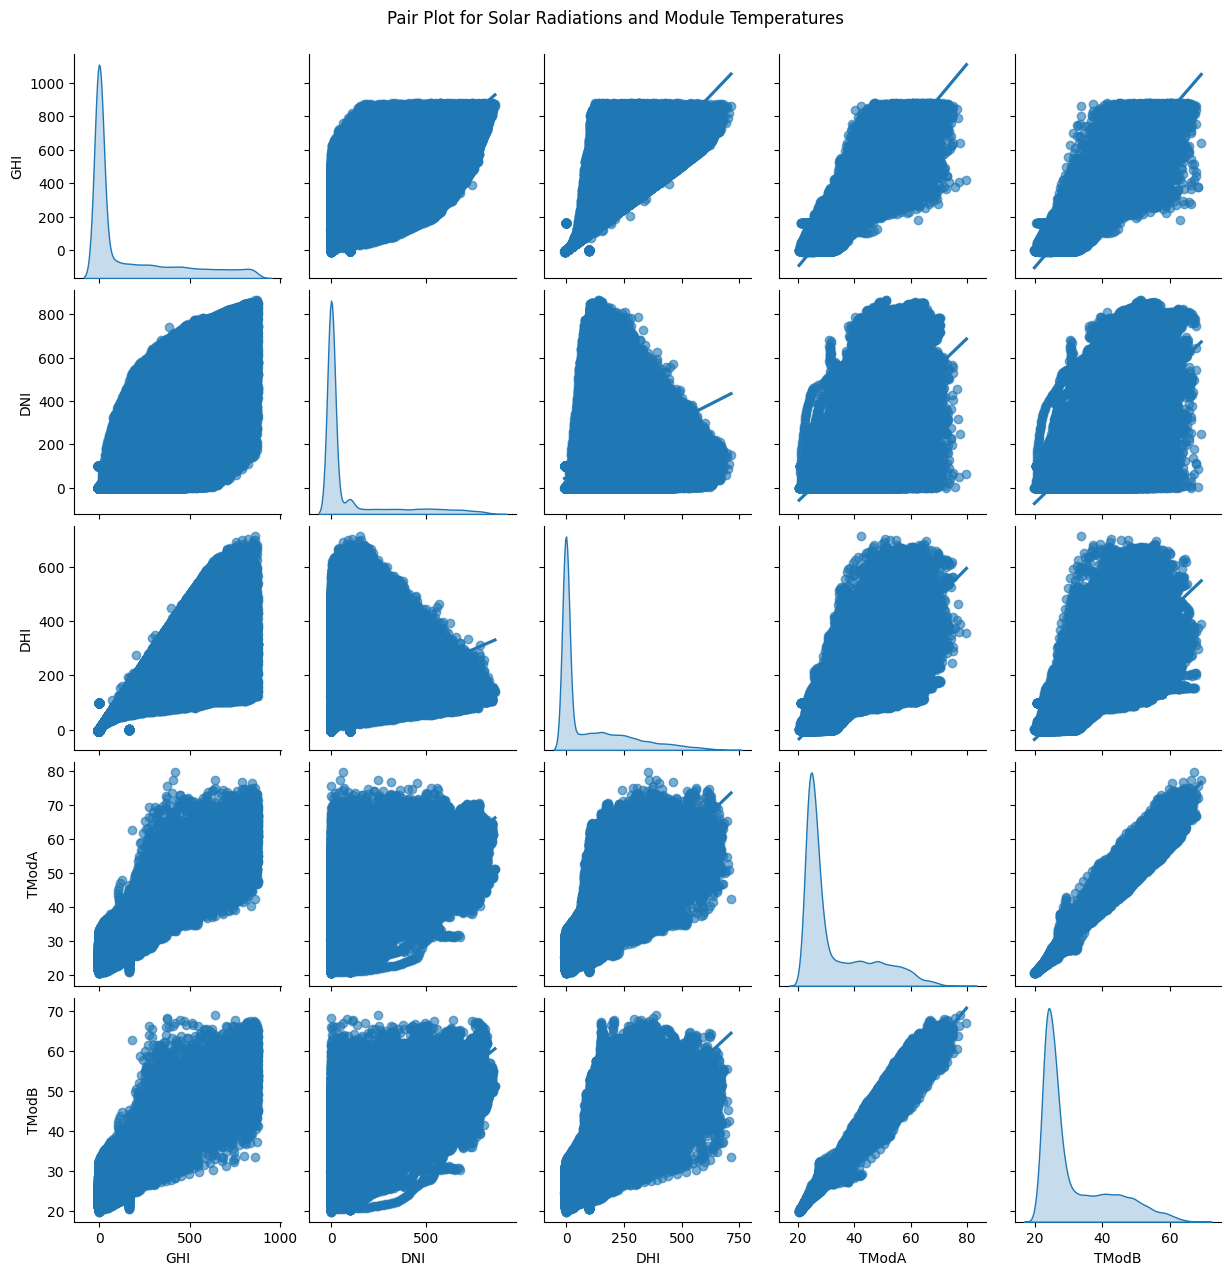

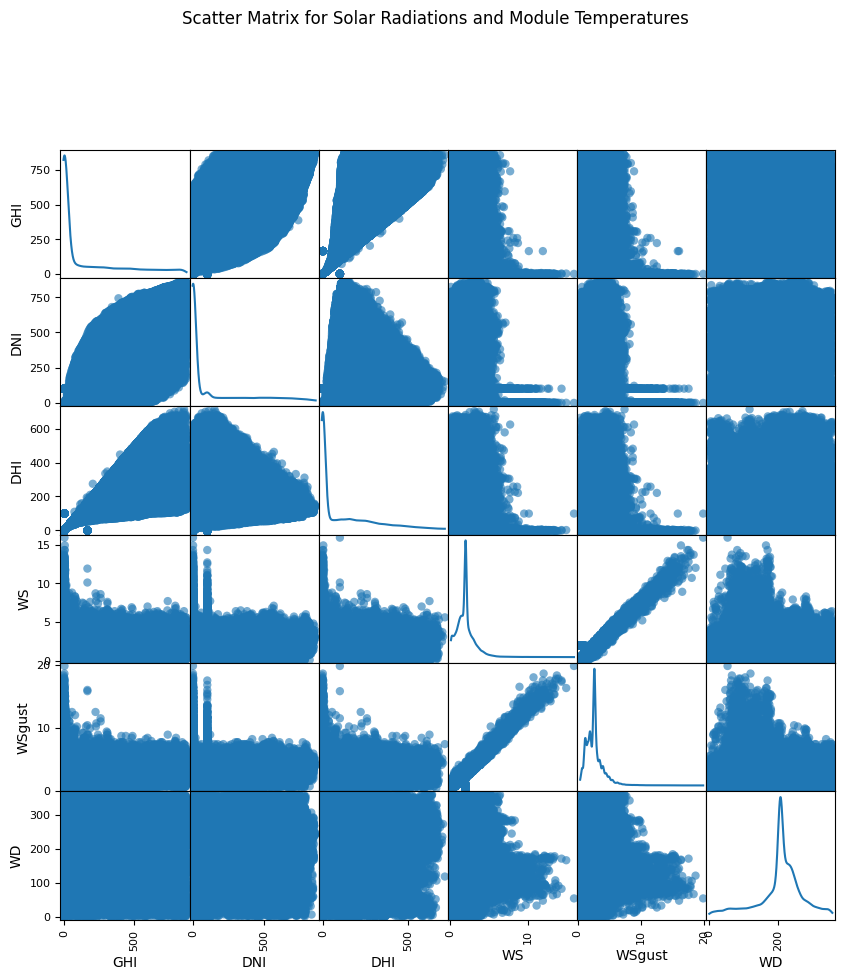

In [8]:
cor_solar_raditation_and_temprature(cleaned_data)
cor_solar_raditation_and_wind_coditions(cleaned_data)

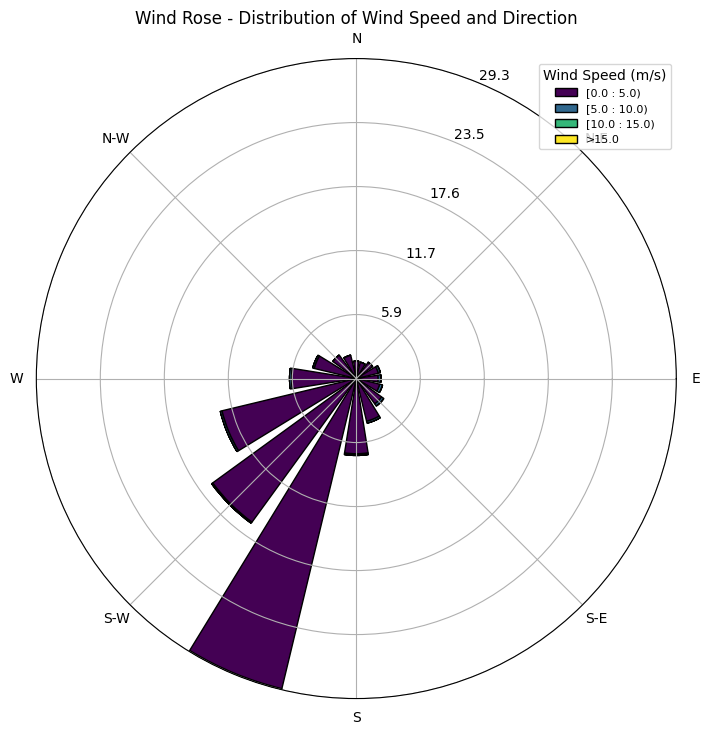

In [9]:
wind_direction_and_speed_analysis(cleaned_data)

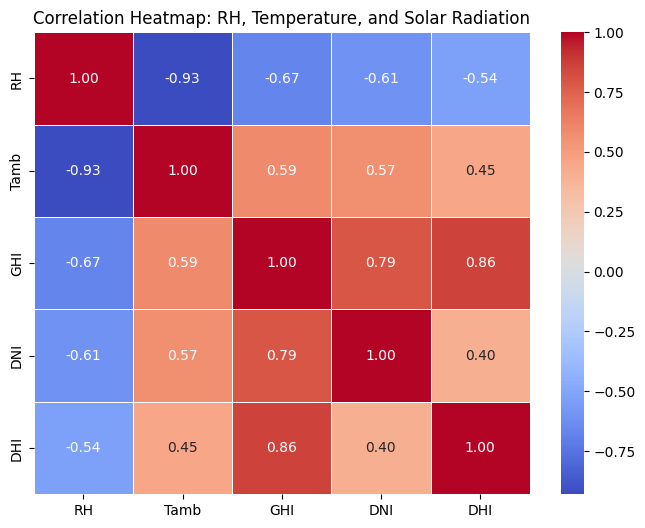

In [10]:
relative_humidity_and_temprature_analysis(cleaned_data)

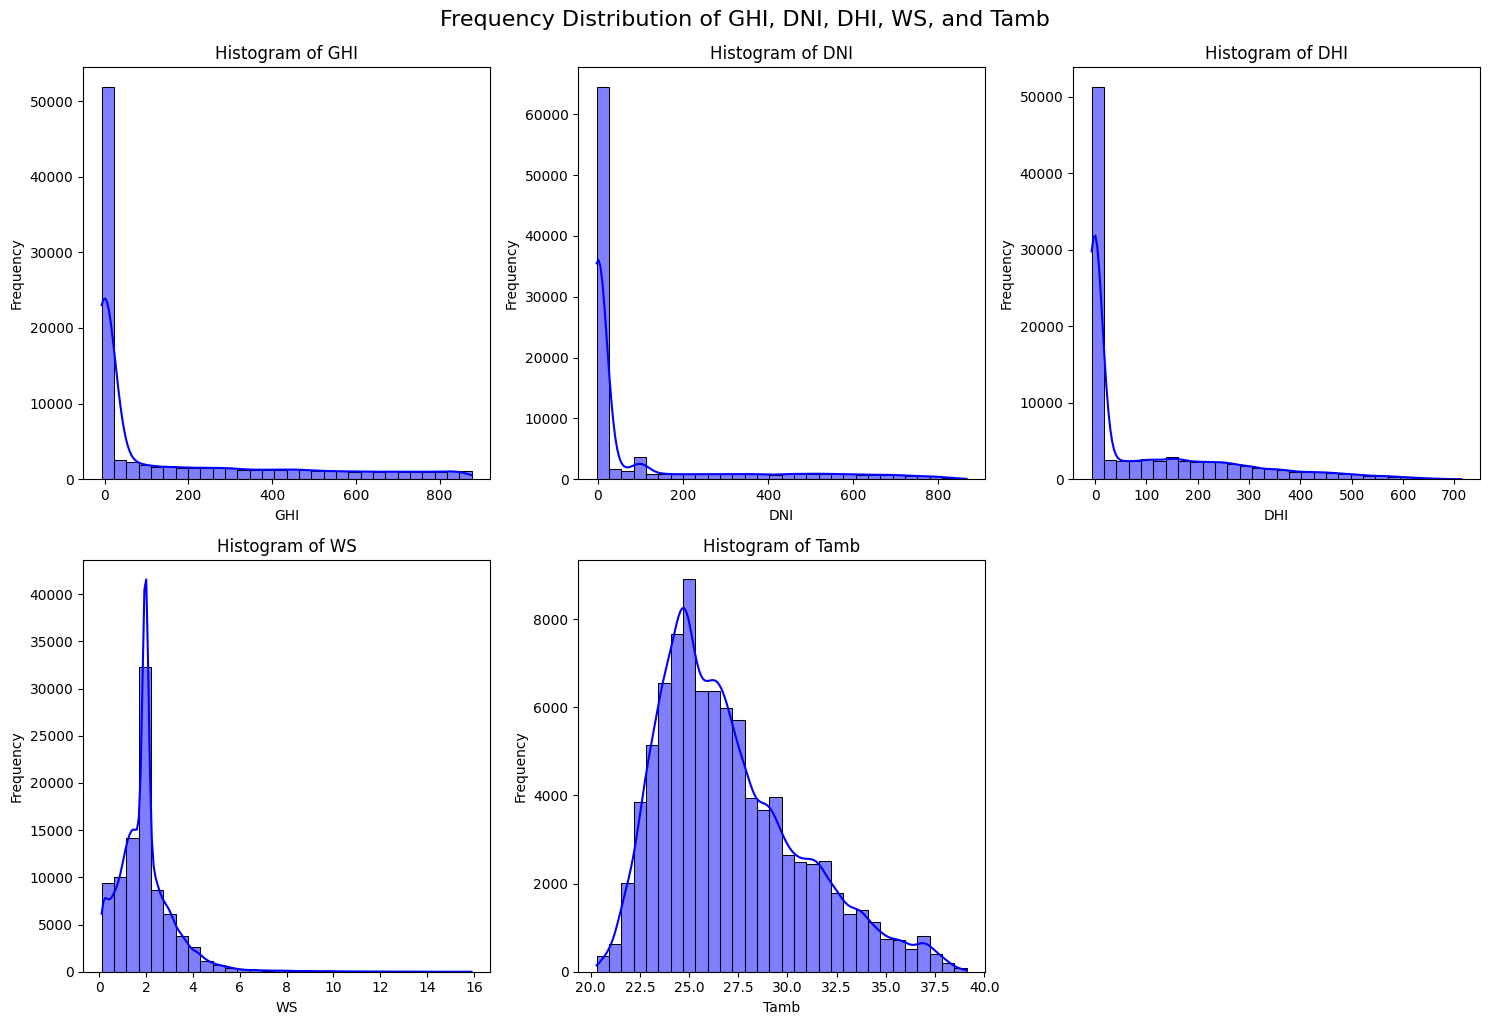

In [11]:
histogram_analysis(cleaned_data)

/workspaces/solar-farm-insights/scripts/bubble_chart_analysis.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('WS_Class').agg({


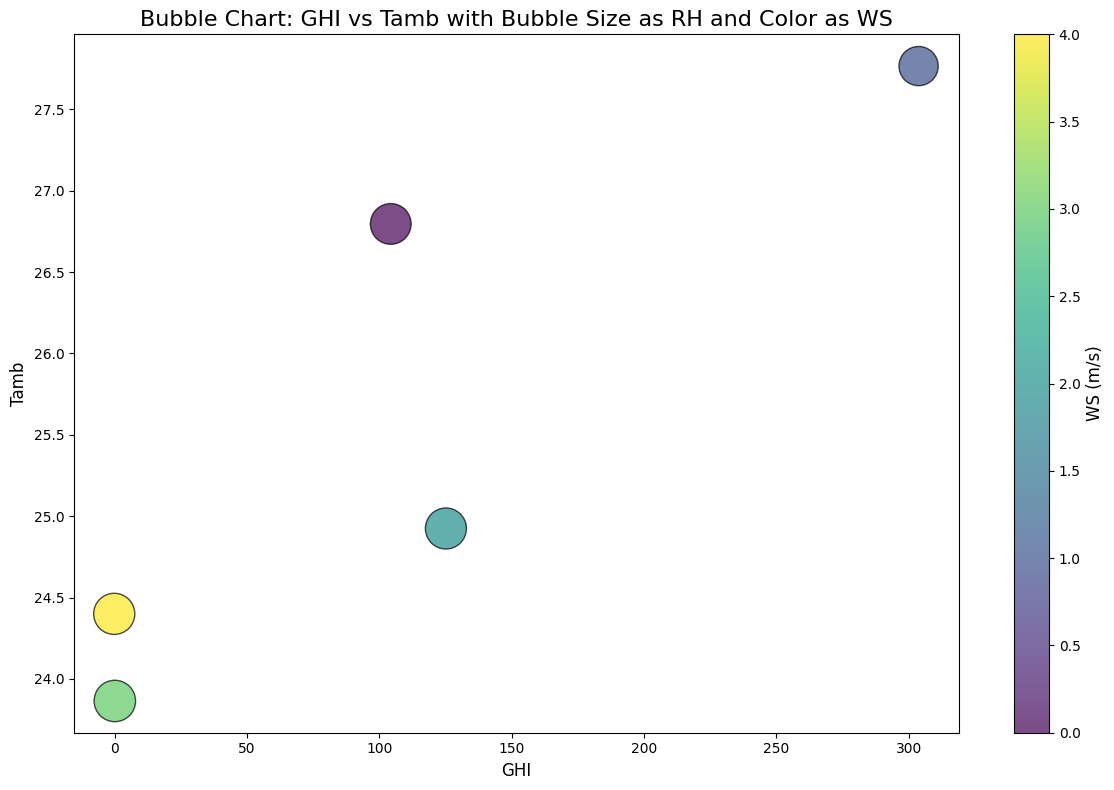

In [12]:
bubble_chart_analysis(cleaned_data)